In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import scipy.io as sio

rho_ow = 1028
rho_ice = 917

paired = sns.color_palette("Paired", 10)

In [2]:
filename ='ANT/ANT_iceshelf_melt_rates_CS2_2010-2018_v0.h5'
is_wb = h5py.File(filename,'r')
filename ='data/figure_1/max_thermal_forcing_200-800.h5'
tf = h5py.File(filename,'r')

In [3]:
x_wb = np.array(is_wb['/x'])
y_wb = np.array(is_wb['/y'])
wb = np.array(is_wb['/w_b'])

x_tf = np.array(tf['/x'])
y_tf = np.array(tf['/y'])
tf_max = np.array(tf['/tf_max'])

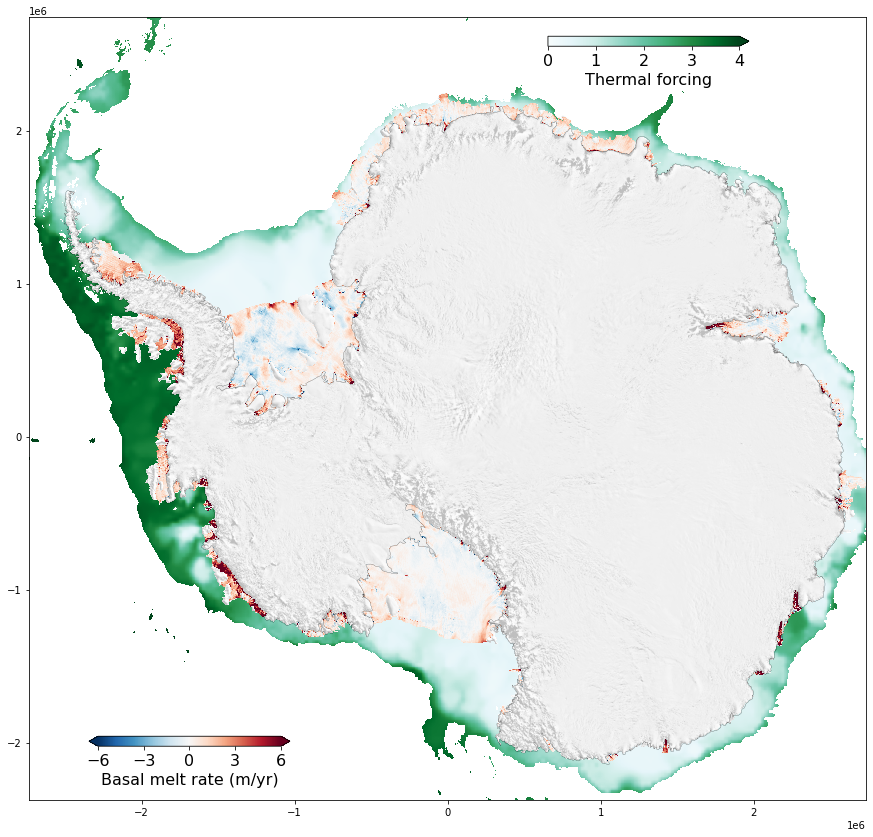

In [4]:
f = plt.figure()
f.set_size_inches(15,15)
plt.rc('axes', axisbelow=False)

plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)

moa = h5py.File('data/moa.h5','r')

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)

extent = [np.min(moa['x']),np.max(moa['x']),np.min(moa['y']),np.max(moa['y'])]
im = ax1.imshow(np.squeeze(moa['RGB']),extent=extent)

extent = [np.min(is_wb['x']),np.max(is_wb['x']),np.min(is_wb['y']),np.max(is_wb['y'])]
im_1 = ax1.imshow(np.flipud(wb),interpolation='none',vmin=-6, vmax=6, cmap='RdBu_r', extent=extent)

extent = [np.min(tf['x']),np.max(tf['x']),np.min(tf['y']),np.max(tf['y'])]
im_2 = ax1.imshow(np.flipud(tf_max),interpolation='none',vmin=0, vmax=4, cmap='BuGn', extent=extent)

plt.plot(np.squeeze(moa['x_gl']),np.squeeze(moa['y_gl']),color='k',linewidth=0.2)
plt.xlim([np.min(is_wb['x']),np.max(is_wb['x'])])
plt.ylim([np.min(is_wb['y']),np.max(is_wb['y'])])

cbaxes = inset_axes(ax1, width="30%", height="2%", loc='lower left',bbox_to_anchor=(190,200,670,500)) 
cbar = plt.colorbar(im_1,cax=cbaxes, ticks=[-6,-3,0,3,6], orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='Basal melt rate (m/yr)',size=16)

cbaxes = inset_axes(ax1, width="30%", height="2%", loc='upper right',bbox_to_anchor=(190,420,670,500)) 
cbar = plt.colorbar(im_2,cax=cbaxes, ticks=[0,1,2,3,4], orientation='horizontal', extend='max')
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='Thermal forcing',size=16)